In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/archive/fruits-360'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [17]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
   

In [18]:
train_path = "archive/fruits-360/Training/"
test_path = "archive/fruits-360/Test/"

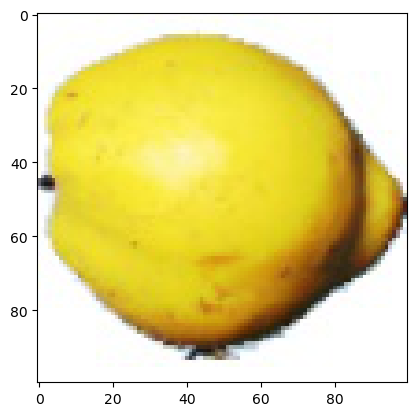

In [29]:
img = load_img(train_path + "Quince/r_305_100.jpg")
plt.imshow(img)
plt.axis("on")
plt.show()

In [30]:
img = img_to_array(img)
img.shape

(100, 100, 3)

In [32]:
model = Sequential()
model.add(Conv2D(128, 3, activation="relu", input_shape=(100,100,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, activation="relu"))
model.add(Conv2D(32, 3, activation="relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.50))
model.add(Flatten())
model.add(Dense(5000, activation ="relu"))
model.add(Dense(1000, activation ="relu"))
model.add(Dense(131, activation ="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        73792     
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 22, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 22, 22, 32)        0

In [33]:
model.compile(loss= "categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

In [39]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                    shear_range = 0.3,
                    horizontal_flip=True,
                    vertical_flip=False,
                    zoom_range = 0.3
                  )
test_datagen  = ImageDataGenerator(rescale = 1./255)
    
train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(100,100),
                                                    batch_size = 32,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path,
                                                    target_size=(100,100),
                                                    batch_size = 32,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical" )

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [45]:
from keras.models import load_model
   
model.save("Fruitmodel.h5")

In [46]:
import tensorflow as tf
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [47]:
test_generator.classes[22687]

130

In [48]:
predictions = probability_model.predict(test_generator)

709/709 [==============================] - 133s 187ms/step


In [50]:
b=predictions[8]
print(b)

[0.00762747 0.00763148 0.00763973 0.00764192 0.00763335 0.00762923
 0.0076357  0.00762516 0.00762617 0.00763219 0.00763431 0.00764033
 0.00763659 0.00762864 0.0076352  0.00763235 0.00763563 0.00764316
 0.00763635 0.00763475 0.00762982 0.00763821 0.00763691 0.00763758
 0.00762294 0.0076288  0.00763631 0.00763733 0.00762817 0.0076286
 0.00763542 0.00763214 0.0076316  0.00763527 0.00762981 0.0076404
 0.00763779 0.00764122 0.00763612 0.00763454 0.00762757 0.00763627
 0.00763431 0.00763718 0.00763418 0.00763249 0.00763626 0.00763128
 0.00762923 0.00762683 0.00763669 0.00764204 0.00763852 0.00763061
 0.00762933 0.00763557 0.0076381  0.00763234 0.00763197 0.00763074
 0.00763236 0.00762502 0.00763288 0.00763015 0.00764461 0.00763253
 0.00763816 0.00763391 0.0076349  0.0076346  0.00763289 0.00762878
 0.00762939 0.00763917 0.00763634 0.00763984 0.00763797 0.00763373
 0.00762783 0.00763167 0.00763016 0.00763722 0.0076348  0.0076354
 0.00763104 0.00763237 0.00763577 0.00763251 0.00763342 0.0076347

In [52]:
np.argmax(b)

105

In [53]:
import os
folder = 'archive/fruits-360/Test'
sub_folders = [name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder, name))]
print(sub_folders[26])

Lemon
